# Challenge - Hardwork Pays Off

👨‍💻 **Arjun Adhikari**, June 12, 2019

In this challenge, we are provided with **wakatime data of  past students** and how they performed in the evaluation exam.  
Our task is to predict the score you will get given the amount of time you spend on coding daily.

**Input**: You are given one feature corresponding to time noted by walkatime.  
**Output**: A scalar denoting the level of perfomance student achived by devoting the given time.  
**Download** the training data and upload your predictions for the testcases given below.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.chdir(r"C:\users\arjun\Desktop\workspace\machine-learning\linear-regression")
print(os.getcwd())

C:\Users\arjun\Desktop\workspace\machine-learning\linear-regression


In [3]:
x = pd.read_csv("./csv/Linear_X_Train.csv").values
y = pd.read_csv("./csv/Linear_Y_Train.csv").values

In [4]:
print(x.shape)
print(y.shape)

(3750, 1)
(3750, 1)


#### Normalization of Data

In [5]:
X = (x - x.mean())/x.std()
Y = y

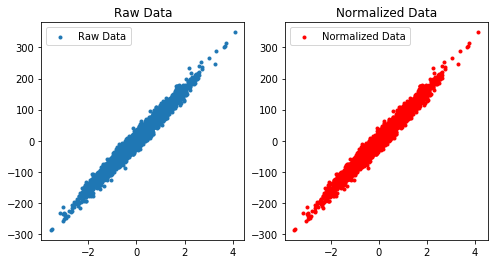

In [6]:
plt.figure(figsize=(8, 4))

plt.subplot(121)
plt.title("Raw Data")
plt.scatter(x,y, label="Raw Data", marker='.')
plt.legend()

plt.subplot(122)
plt.title("Normalized Data")
plt.scatter(X,Y, label="Normalized Data", marker='.', color='red')
plt.legend()
plt.show()

Data seems like it's already normalized.

#### Hypothesis Function

In [7]:
def hypothesis(X,theta):
    
    return theta[0] + theta[1]*X

#### Error Function

In [8]:
def error(X, Y, theta):
    
    m = X.shape[0]
    total_error = 0
    
    for i in range(m):
        
        total_error += (hypothesis(X[i], theta) - Y[i])**2
        
    return total_error

#### Gradient Function

In [9]:
def gradient(X, Y, theta):
    
    m = X.shape[0]
    grad = np.array([0.0, 0.0])
    
    for i in range(m):
        
        hx = hypothesis(X[i], theta)
        grad[0] += (hx - Y[i])
        grad[1] += (hx - Y[i])*X[i]   
        
    return grad

#### Gradient Descent Algorithm
Set $learningrate = 0.0001$

In [10]:
def gradientDescent(X, Y, learning_rate=0.0001):
    
    error_list = []
    theta_list = []
    
    itr = 0
    max_itr = 100
    
    theta = np.array([0.0, 0.0])
    grad = np.array([0.0, 0.0])
    
    while itr <= max_itr:
        
        grad = gradient(X, Y, theta)
        err = error(X, Y, theta)
        
        theta_list.append((theta[0], theta[1]))
        error_list.append(err)
        
        theta[0] -= learning_rate*grad[0]
        theta[1] -= learning_rate*grad[1]
        
        itr += 1
        
    return theta, error_list, theta_list

In [11]:
theta = np.array([0.0, 0.0])

final_theta, error_list, theta_list = gradientDescent(X,Y)
print(final_theta)

[ 0.68386897 79.90573694]


#### Error Curve

In [12]:
error_list = np.array(error_list)
print(error_list.shape)

(101, 1)


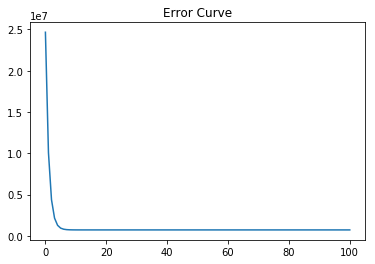

In [13]:
plt.plot(error_list)
plt.title("Error Curve")
plt.show()

### Testing Data

In [14]:
xtest = np.linspace(-5, 5, 15)
print(xtest)

[-5.         -4.28571429 -3.57142857 -2.85714286 -2.14285714 -1.42857143
 -0.71428571  0.          0.71428571  1.42857143  2.14285714  2.85714286
  3.57142857  4.28571429  5.        ]


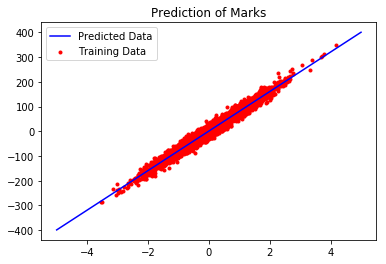

In [15]:
plt.scatter(X,Y, label='Training Data', color='red', marker='.')
plt.plot(xtest, hypothesis(xtest, final_theta), label='Predicted Data', color='blue')

plt.title("Prediction of Marks")
plt.legend()
plt.show()